# FINM 250 Homework 1
## TA Solutions

# Part 2

### 1.a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the adjustment to be 12; in python, the convention
# is to use all caps for global constants.
ADJ = 12

rets = pd.read_excel(
    "../data/multi_asset_etf_data.xlsx",
    sheet_name="excess returns",  # Specify the sheet name
    index_col=0,  # Set the index to the first column in the excel sheet
    parse_dates=[
        0
    ],  # Parse the dates from the first column to turn them into datetime objects
)

# Sanity check to make sure the data is loaded correctly
rets.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


In [2]:
# Build a dictionary to store the summary statistics, note that
# in pandas you *generally* want to avoid building DataFrames iteratively,
# ie. by appending rows and columns to a DataFrame one at a time, since
# there is a big performance hit.


def performance_summary(rets, adj_factor=12):
    # Here, we use the keyword argument adj_factor to adjust the
    # annualization factor, which, since in this course we will
    # mainly deal with monthly data, is set to 12 by default.

    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)


# Since part b asks to find the best and worst Sharpe Ratios, we can
# use the .sort_values method to sort the DataFrame by the Sharpe Ratio.
metrics = performance_summary(rets).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
metrics.style.format("{:.2}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.15,0.15,0.98
HYG,0.063,0.088,0.71
IYR,0.12,0.19,0.65
PSP,0.13,0.23,0.59
EFA,0.084,0.16,0.51
TIP,0.02,0.052,0.39
QAI,0.019,0.051,0.38
EEM,0.065,0.19,0.33
IEF,0.011,0.064,0.17
DBC,0.022,0.18,0.12


### 1.b

We see that SPY has the best Sharpe ratio, with a value of 0.98. This is somewhat expected, given the incredible bull-run that SPY had from 2009-2022, and then again from late 2022 to 2024. HYG (high-yield corporate bonds) has the second best, at 0.71. BWX has the worst Sharpe ratio, at -0.053, and is also the only ETF with negative returns over the period. Second worst is DBC, with a Sharpe ratio of 0.12.

### 2.a

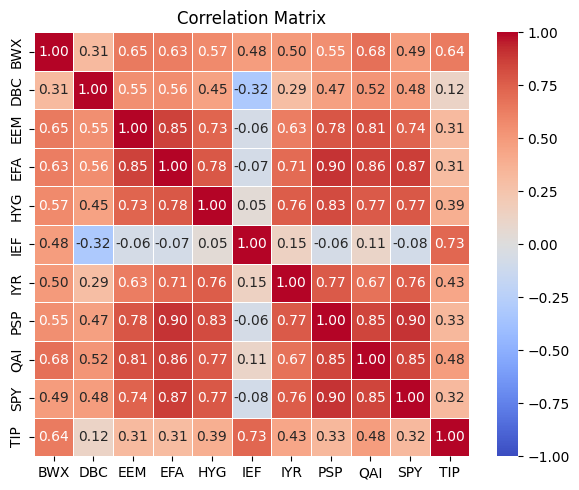

In [3]:
corr_matrix = rets.corr()

# Plot the correlation matrix using seaborn's heatmap function, there are a lot of arguments here,
# so do not worry about understanding them, simply calling sns.heatmap() with the corr_matrix
# is enough to get the job done.


def plot_corr_matrix(corrs):
    return sns.heatmap(
        corrs,  # The correlation matrix
        annot=True,  # Annot means include the correlation values in the heatmap
        cmap="coolwarm",  # The color scheme to use
        vmin=-1,
        vmax=1,  # Specify the max and min values for the color scheme, otherwise they will
        # be set to the min and max values of the correlation matrix, which is not
        # particularly useful.
        linewidths=0.7,  # The width of the lines that will divide each cell, mainly an aesthetic choice,
        # but it does make the heatmap easier to read.
        annot_kws={
            "size": 10
        },  # Specify the size of the annotation text to avoid overflow into adjacent cells.
        fmt=".2f",  # Specify the format of the annotation text, in this case, we want to round to 2 decimal places.
        # See: https://kuvapcsitrd01.kutztown.edu/~schwesin/fall20/csc223/lectures/Python_String_Formatting.html
    )


fig, _ = plt.subplots(figsize=(6, 5))
ax = plot_corr_matrix(corr_matrix)

# Specify the axis to plot on, this is NOT necessary, but it is good when using multiple subplots.
ax.set_title("Correlation Matrix")  # Set the title of the plot
fig.tight_layout()  # This adjusts spacing.

In [4]:
# Get highest and lowest correlations.
# Unstack the correlation matrix to get a series of all the correlations.
corr_series = corr_matrix.unstack()

# Next, we want to remove all the correlations of each asset with itself, since
# they will all be 1, and we are not interested in them.
corr_series = corr_series[corr_series != 1]
max_corr = corr_series.idxmax()
min_corr = corr_series.idxmin()

# Get the values.
max_corr_val = corr_series[max_corr]
min_corr_val = corr_series[min_corr]

# Note, the above code can also be written by using the DataFrame.agg method, which
# allows us to apply multiple functions to a DataFrame at once.
max_corr = corr_series.abs().agg(["idxmax", "max"]).T
min_corr = corr_series.abs().agg(["idxmin", "min"]).T
min_corr_raw = corr_series.agg(["idxmin", "min"]).T
max_corr, max_corr_val = max_corr["idxmax"], max_corr["max"]
min_corr, min_corr_val = min_corr["idxmin"], min_corr["min"]
min_corr_raw, min_corr_raw_val = min_corr_raw["idxmin"], min_corr_raw["min"]

# Print the results. Note how we use {:.2f} to round to 2 decimal places.
print(
    f"Max Corr (by absolute value): {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.2f}"
)
print(
    f"Min Corr (by absolute value): {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.2f}"
)
print(
    f"Min Corr (raw): {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_val:.2f}"
)

Max Corr (by absolute value): EFA and PSP with a correlation of 0.90
Min Corr (by absolute value): HYG and IEF with a correlation of 0.05
Min Corr (raw): DBC and IEF with a correlation of -0.32


Most of the assets have quite high correlations with each other, as shown by the heatmap. In fact, the only asset that displays negative correlations with the others is IEF. TIP is also on the lower end of the correlation spectrum.

#### 2.b

In [5]:
# This is quite an open ended question, since what really defines "outperformance" is
# somewhat subjective. We can look at the mean returns and sharpe ratio. You'll be better
# able to answer this question after we cover risk metrics.
#
# Domestic bond ETF is IEF, foreign is BWX.

# Get the mean returns and sharpe ratios.
bonds = metrics.loc[["TIP", "IEF", "BWX"]]

# Get the rank of the metrics.
bonds.loc[:, ["Rank Mean", "Rank Vol", "Rank Sharpe"]] = (
    metrics.rank(ascending=False)
    .loc[
        ["TIP", "IEF", "BWX"],
        ["Annualized Mean", "Annualized Volatility", "Annualized Sharpe Ratio"],
    ]
    .values
)

bonds.style.format("{:.2f}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,Rank Mean,Rank Vol,Rank Sharpe
TIP,0.02,0.05,0.39,8.00,10.00,6.00
IEF,0.01,0.06,0.17,10.00,9.00,9.00
BWX,-0.00,0.09,-0.05,11.00,8.00,11.00


We see that TIP performs in about the middle of the pack, coming in 6th out of 11 in terms of Sharpe, and 8th out of 11 in terms of mean. However, it does have the second lowest volatility, which is a good thing.

I would argue that it outperforms both IEF and BWX. TIP has both a higher mean and lower volatility than the other two ETFs. So, yes, they have outperformed the other types of bonds.

In [6]:
# Check the correlations between the assets.
corr_matrix.loc[["TIP", "IEF", "BWX"], ["TIP", "IEF", "BWX"]]

,TIP,IEF,BWX
TIP,1.000000,0.725957,0.637803
IEF,0.725957,1.000000,0.483613
BWX,0.637803,0.483613,1.000000


### 2.c

The answer for this is "it depends". Although TIP perform better than the other two bond ETFs, they have a high correlation to both. So, in that sense they do expand the investment opportunity set. However, IEF is just 7-10 year treasuries, and thus is not meaningfully different from TIP, which are inflation-protected treasuries. Therefore, I would argue that Harvard should not consider them as their own asset class, but rather incorporate them into their existing treasury portfolio.

However, if we are limited to these choices of ETFs, rather than Harvard's thousands of assets, then yes, we should consider them their own asset class.

### 3.a, b

In [7]:
def tan_portfolio(mean_rets, cov_matrix):
    """
    Function to calculate tangency portfolio weights. Comes from the
    formula seen in class (Week 1).

    Args:
        mean_rets: Vector of mean returns.
        cov_matrix: Covariance matrix of returns.

    Returns:
        Vector of tangency portfolio weights.
    """
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(mean_rets.shape)
    return (inv_cov @ mean_rets) / (ones.T @ inv_cov @ mean_rets)

def gmv_portfolio(cov_matrix):
    """
    Function to calculate the weights of the global minimum variance portfolio.

    Args:
        cov_matrix : Covariance matrix of returns.

    Returns:
        Vector of GMV portfolio weights.
    """
    try:
        cov_inv = np.linalg.inv(cov_matrix)
    except TypeError:
        cov_inv = np.linalg.inv(np.array(cov_matrix))

    one_vector = np.ones(len(cov_matrix.index))
    return cov_inv @ one_vector / (one_vector @ cov_inv @ (one_vector))


def mv_portfolio(mean_rets, cov_matrix, target=None, excess=True):
    """
    Function to calculate the weights of the mean-variance portfolio. If
    target is not specified, then the function will return the tangency portfolio.
    If target is specified, then we return the MV-efficient portfolio with the target
    return.
    
    **This assumes we have access to a risk-free asset**

    Args:
        mean_rets : Vector of mean returns.
        cov_matrix : Covariance matrix of returns.
        target (optional):  Target mean return. Defaults to None. Note: must be adjusted for
                            annualization the same time-frequency as the mean returns. If the
                            mean returns are monthly, the target must be monthly as well.
        excess (options): Whether or not we are using excess returns.

    Returns:
        Vector of MV portfolio weights.
    """
    w_tan = tan_portfolio(mean_rets, cov_matrix)

    if target is None:
        return w_tan
    
    elif not excess:
        w_gmv = gmv_portfolio(cov_matrix)
        delta = (target - mean_rets @ w_gmv) / (mean_rets @ w_tan - mean_rets @ w_gmv)
        return delta * w_tan + (1 - delta) * w_gmv
    else:
        ones = np.ones(mean_rets.shape)
        cov_inv = np.linalg.inv(cov_matrix)
        delta = (ones @ cov_inv @ mean_rets) / (mean_rets.T @ cov_inv @ ones) 
        return target * delta * w_tan


# Note: we are NOT annualizing here.
w_tan = mv_portfolio(rets.mean(), rets.cov())

w_tan_df = pd.DataFrame(w_tan, index=rets.columns, columns=["Tangency Portfolio"])

# Here, we use the display() function to show both the weights and the performance summary,
# without having to make two separate cells, and not mess up the formatting caused by print().
display(
    w_tan_df.sort_values(by="Tangency Portfolio", ascending=False).style.format(
        "{:.2f}"
    )
)

# Calculate the portfolio returns.
w_tan_rets = rets @ w_tan_df

# We could use linear algebra to directly calculate the
# portfolio statistics, but we will stick to using the
# performance_summary function for consistency, and also,
# if we want to calculate other risk metrics, we will need
# to use the performance_summary function.
tan_summ = performance_summary(w_tan_rets)
display(tan_summ.style.format("{:.2f}"))

,Tangency Portfolio
SPY,69.90
IEF,62.96
HYG,34.75
EEM,10.02
TIP,5.45
DBC,1.70
EFA,0.51
PSP,-11.53
IYR,-12.37
BWX,-46.26


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66


### 4.a, b

In [8]:
target_port = pd.DataFrame(
    mv_portfolio(rets.mean(), rets.cov(), target=0.0075),
    index=rets.columns,
    columns=["Target Portfolio"],
)
target_rets = rets @ target_port
target_summ = performance_summary(target_rets)

# Note: I'm sorting by target portfolio here,
# and not the tangency portfolio like in question 3.
display(
    pd.concat([w_tan_df, target_port, metrics[["Annualized Sharpe Ratio"]]], axis=1)
    .sort_values(by="Target Portfolio", ascending=False)
    .style.format("{:.3f}")
)
display(pd.concat([tan_summ, target_summ], axis=0).style.format("{:.2f}"))

,Tangency Portfolio,Target Portfolio,Annualized Sharpe Ratio
SPY,69.901,0.524,0.981
IEF,62.959,0.472,0.175
HYG,34.747,0.261,0.713
EEM,10.018,0.075,0.335
TIP,5.451,0.041,0.391
DBC,1.701,0.013,0.125
EFA,0.512,0.004,0.509
PSP,-11.528,-0.086,0.592
IYR,-12.366,-0.093,0.647
BWX,-46.264,-0.347,-0.053


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66
Target Portfolio,0.07,0.04,1.66


### 4.c

The target portfolio is most long in SPY, followed by IEF and HYG. It is the most short in QAI (by quite a large margin), followed by BWX and IYR. 

### 4.d

Yes and no. SPY has the best Sharpe ratio, and we are long SPY. BWX has the worst Sharpe ratio and we are short BWX. However, we are short IYR, which has the 3rd highest Sharpe ratio. So, overall, I would argue that for the most long and most short allocations, it roughly aligns with the Sharpe ratios of the assets, but there is no clear pattern. This makes sense given that the it's the *covariance* between assets that matters the most, not just the returns.

### 5.a, b

In [9]:
# Calculate the equal weighted portfolio.
w_eq = np.ones(len(rets.columns)) / len(rets.columns)

# Rescale to fit to target return of 0.0075.
w_eq = w_eq * (0.0075 / (rets.mean() @ w_eq))

# Calculate the returns of the equal weighted portfolio.
w_eq_rets = (rets @ w_eq).to_frame("Equally Weighted")

# Risk parity portfolio.
w_rp = np.array(1 / np.sqrt(np.diag(rets.cov())))

# Again, rescale to fit to target return of 0.0075.
w_rp = w_rp * (0.0075 / (rets.mean() @ w_rp))

# Calculate the returns of the risk parity portfolio.
w_rp_rets = (rets @ w_rp).to_frame("Risk Parity")

# Calculate performance summaries.
w_eq_summ = performance_summary(w_eq_rets)
w_rp_summ = performance_summary(w_rp_rets)

w_comp = pd.DataFrame(
    np.array([w_eq, w_rp]).T,
    index=rets.columns,
    columns=["Equally Weighted", "Risk Parity"],
)

w_comp["Tangency"] = w_tan_df
w_comp["Target"] = target_port

# Concat and display.
display(w_comp.style.format("{:.3f}"))
pd.concat([w_eq_summ, w_rp_summ, tan_summ, target_summ], axis=0).T.style.format(
    "{:.4f}"
)

,Equally Weighted,Risk Parity,Tangency,Target
BWX,0.132,0.220,-46.264,-0.347
DBC,0.132,0.107,1.701,0.013
EEM,0.132,0.097,10.018,0.075
EFA,0.132,0.114,0.512,0.004
HYG,0.132,0.213,34.747,0.261
IEF,0.132,0.292,62.959,0.472
IYR,0.132,0.099,-12.366,-0.093
PSP,0.132,0.083,-11.528,-0.086
QAI,0.132,0.369,-114.131,-0.856
SPY,0.132,0.127,69.901,0.524


,Equally Weighted,Risk Parity,Tangency Portfolio,Target Portfolio
Annualized Mean,0.0900,0.0900,8.8122,0.0661
Annualized Volatility,0.1511,0.1550,5.2934,0.0397
Annualized Sharpe Ratio,0.5958,0.5808,1.6647,1.6647


### 5.c

It's very different. For starters, both the tangency and the target portfolio have long/short positions. The equally weighted and risk parity ones don't. Moreover, all of the weights are quite a bit smaller in the equally weighted and risk parity portfolios. The tangency and target portfolios are much more concentrated in their top 3 and bottom 3 assets. This also makes sense since by shorting assets, you can have much bigger magnitudes of weights (that still sum to 1) than if you only go long.

Both portfolios have worse Sharpe ratios than the tangency and target MV portfolio. This is to be expected given that by definition the tangency maximizes sharpe, and the target portfolio maximizes sharpe subject to a target return. The equally weighted weighted and risk parity portfolios have much higher volatility than the target MV portfolio. They also have very similar Sharpe ratios and volatilities.

This is somewhat unexpected given that by the risk-parity definition, the weight of an asset is inversely proportional to the volatility, so I would have expected it to have lower volatilility. However, this makes sense if we consider that the main factor is the covariances, which risk-parity does not account for at all.

### 6

In [10]:
# Drop TIPS.
rets_no_tips = rets.drop("TIP", axis=1)

# Calculate the tangency portfolio.
w_tan_no_tips = mv_portfolio(rets_no_tips.mean(), rets_no_tips.cov())

# Calculate the returns of the tangency portfolio.
w_tan_no_tips_rets = (rets_no_tips @ w_tan_no_tips).to_frame(
    "Tangency Portfolio (No TIPS)"
)

# Calculate the performance summary.
w_tan_no_tips_summ = performance_summary(w_tan_no_tips_rets)

# Display weights
display(
    pd.concat(
        [
            w_tan_df,
            pd.Series(
                w_tan_no_tips,
                name="Tangency Portfolio (No TIPs)",
                index=rets_no_tips.columns,
            ),
        ],
        axis=1,
    )
    .sort_values(by="Tangency Portfolio", ascending=False)
    .style.format("{:.2f}")
)

pd.concat([w_tan_no_tips_summ, tan_summ], axis=0).T.style.format("{:.4f}")

,Tangency Portfolio,Tangency Portfolio (No TIPs)
SPY,69.90,270.60
IEF,62.96,255.36
HYG,34.75,133.86
EEM,10.02,38.92
TIP,5.45,nan
DBC,1.70,8.03
EFA,0.51,0.27
PSP,-11.53,-43.80
IYR,-12.37,-47.27
BWX,-46.26,-177.41


,Tangency Portfolio (No TIPS),Tangency Portfolio
Annualized Mean,33.9335,8.8122
Annualized Volatility,20.3913,5.2934
Annualized Sharpe Ratio,1.6641,1.6647


It, of course, has a lower Sharpe (but only by a little bit -- 1.6641 vs 1.6647). The reason for this is that adding assets **cannot** decrease the Sharpe ratio of the tangency portfolio. This is because if an asset contributes nothing, it will just have 0 weight in the tangency, so the best we can do is maintain an equal portfolio when we remove an asset. However, if the asset that we remove has non-zero weight, then it must decrease the Sharpe of the tangency.

What is interesting is how much higher the mean and vol are of this new portfolio. Additionally, whilst the weights agree in terms of which are long/short, the magnitudes are vastly different. For example, QAI went from a weight of -114 to -438, and SPY/IEF went from the 60-70s to 250-270.

In [11]:
w_tan_notips_target = mv_portfolio(
    rets_no_tips.mean(), rets_no_tips.cov(), target=0.0075
)

w_tan_notips_target_rets = (rets_no_tips @ w_tan_notips_target).to_frame(
    "Target Portfolio (No TIPS)"
)

w_tan_notips_target_summ = performance_summary(w_tan_notips_target_rets).T
w_tan_notips_target_summ["Target Portfolio"] = target_summ.T["Target Portfolio"]

target_port.loc[:"SPY", "Target Portfolio (No TIPS)"] = w_tan_notips_target
display(target_port[target_port.columns[::-1]].style.format("{:.3f}"))
display(w_tan_notips_target_summ)

,Target Portfolio (No TIPS),Target Portfolio
BWX,-1.331,-0.347
DBC,0.060,0.013
EEM,0.292,0.075
EFA,0.002,0.004
HYG,1.004,0.261
IEF,1.915,0.472
IYR,-0.355,-0.093
PSP,-0.329,-0.086
QAI,-3.282,-0.856
SPY,2.030,0.524


,Target Portfolio (No TIPS),Target Portfolio
Annualized Mean,0.254501,0.066091
Annualized Volatility,0.152935,0.039700
Annualized Sharpe Ratio,1.664114,1.664748


It has extremely similar allocations across the board, all positions where the original target portfolio was short are still short, all positions where the target portfolio was long are still long. The only big-ish difference is that the SPY allocation dropped from 2 to 0.5. QAI, IEF and HYG also have different weights. 

The Sharpe ratios and volatilities are almost identical, meaning that we haven't lost much by discarding TIPS.

## Part 3 - Extras

### 1.a

In [12]:
two_asset = rets[["TIP", "IEF"]]

w_two_asset = mv_portfolio(two_asset.mean(), two_asset.cov(), target=0.0135)
w_two_asset = pd.DataFrame(w_two_asset, index=two_asset.columns, columns=["Two Asset"])
display(w_two_asset.style.format("{:.2f}"))
display(performance_summary(two_asset @ w_two_asset).style.format("{:.2f}"))

,Two Asset
TIP,0.02
IEF,-0.01


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Two Asset,0.00,0.00,0.42


### 1.b

The cause behind the extreme long/short is that in the two asset case, we short the asset with the lower Sharpe, to fund the asset with the higher Sharpe. Thus, we are going "all-in" on the asset with the higher Sharpe.

### 1.c

In [13]:
two_asset_perturbed = two_asset.mean()
two_asset_perturbed["TIP"] -= 0.0015

w_two_asset_perturbed = mv_portfolio(
    two_asset_perturbed, two_asset.cov(), target=0.0135
)

w_two_asset_perturbed = pd.DataFrame(
    w_two_asset_perturbed, index=two_asset.columns, columns=["Two Asset Perturbed"]
)

display(w_two_asset_perturbed.style.format("{:.2f}"))
display(performance_summary(two_asset @ w_two_asset_perturbed).style.format("{:.2f}"))

,Two Asset Perturbed
TIP,-0.04
IEF,0.05


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Two Asset Perturbed,-0.00,0.00,-0.08


We entirely flipped the allocation, and now have negative returns.

### 1.d

It tells you that they are not precise whatsoever (vanilla MV). This is because due to high correlations, the covariance matrix is close to singular, and thus the inverse is very unstable. That means that even a small (1.5 basis-point) change in the returns can cause a huge change in the weights.

### 2.a, d

In [14]:
cov_diag = np.diag(np.diag(rets.cov()))

cov_diag = pd.DataFrame(cov_diag, index=rets.columns, columns=rets.columns)

w_diag = mv_portfolio(rets.mean(), cov_diag, target=0.0075)
w_diag = pd.DataFrame(w_diag, index=rets.columns, columns=["Diagonal Covariance"])

w_diag_rets = rets @ w_diag

# Compare with risk parity.
w_diag["Risk Parity"] = w_rp
w_diag["Target Portfolio"] = target_port["Target Portfolio"]
w_diag_summ = performance_summary(w_diag_rets).T
w_diag_summ["Risk Parity"] = w_rp_summ.T
w_diag_summ["Target Portfolio"] = target_summ.T["Target Portfolio"]

display(w_diag.style.format("{:.2f}"))
display(w_diag_summ.style.format("{:.2f}"))

,Diagonal Covariance,Risk Parity,Target Portfolio
BWX,-0.00,0.22,-0.35
DBC,0.00,0.11,0.01
EEM,0.00,0.10,0.08
EFA,0.00,0.11,0.00
HYG,0.00,0.21,0.26
IEF,0.00,0.29,0.47
IYR,0.00,0.10,-0.09
PSP,0.00,0.08,-0.09
QAI,0.00,0.37,-0.86
SPY,0.00,0.13,0.52


,Diagonal Covariance,Risk Parity,Target Portfolio
Annualized Mean,0.00,0.09,0.07
Annualized Volatility,0.00,0.15,0.04
Annualized Sharpe Ratio,0.74,0.58,1.66


### 2.a - Discussion

It looks quite different from the MV target portfolio, but somewhat similar to the risk-parity one. It has a better Sharpe ratio than the risk-parity portfolio, whilst also not have the extreme weights that the MV target portfolio has.

### 2.b

Between 3.1 and 3.2, this tells us that the tangency portfolio is highly unstable. Thus, it can be quite hard to implement it in practice, since we expect to have quite a bit of error in our estimates of the returns and covariances.

### 2.c

The pros: you are able to keep the weights in-line by using simple heuristics which place bounds on the weights. You can then use MV-optimization to get the best weights within those bounds. It's also easy to interpret, and easy to implement. Moreover, you can follow the mandate of the fund, and draw on the experience of portfolio managers when imposing those constraints. 

Also, using a diagonalized covariance matrix is somewhat suspect, given that we **know** assets have non-zero covariances so it is an extremely strong assumption to make. Beyond this course: we can also use more advanced shrinkage methods such as Ledoit-Wolf, OAS, or Marcenko-Pastur.

The cons: you can needlessly limit your Sharpe ratio if one of the constraints you place is bounding. By removing the constraints you're able to get a purely quantitative allocation, which likely will perform better than the constrained one. It is also somewhat arbitrary, and can be hard to justify why you chose the constraints that you did.

### 2.d

It agrees with risk-parity for the most part. The weights are mostly the same, with the exception of BWX, where we are short in the diagonalized case, but long in the risk-parity case. This makes sense since BWX has low variance but also low returns, and risk-parity only looks at the variances.


### 3.a,b,c

In [15]:
# You may cover iterators with Seb later in the course,
# but itertools (and the external library more_itertools)
# are among the most useful libraries in Python when it comes
# using any kind of looping.
from itertools import pairwise

summary_comp = pd.DataFrame(
    columns=["Equal Weight", "Risk Parity", "Tangency", "Diagonal"]
)

# Step through 2014-2023...
for curr_year, next_year in pairwise(range(2014, 2023)):
    # Turn year to string.
    curr_year = str(curr_year)
    next_year = str(next_year)

    # Get returns for this year and next year
    in_sample = rets.loc[curr_year, :]
    out_sample = rets.loc[next_year, :]

    # Calculate the covariance matrix and diagonalized covariance matrix.
    is_cov = in_sample.cov()
    is_cov_diag = pd.DataFrame(
        np.diag(np.diag(is_cov)), index=in_sample.columns, columns=in_sample.columns
    )
    is_mean = in_sample.mean()

    # Calculate the different weights & Returns
    is_w_eq = np.ones(len(in_sample.columns)) / len(in_sample.columns)
    w_eq_rets = (out_sample @ is_w_eq).to_frame("Equal Weight")

    is_w_rp = np.array(1 / np.sqrt(np.diag(is_cov)))
    w_rp_rets = (out_sample @ is_w_rp).to_frame("Risk Parity")

    is_w_tan = mv_portfolio(is_mean, is_cov)
    is_w_diag = mv_portfolio(is_mean, is_cov_diag)

    w_tan_rets = (out_sample @ is_w_tan).to_frame("Tangency")
    w_diag_rets = (out_sample @ is_w_diag).to_frame("Diagonal")

    # Append to existing...
    all_rets = pd.concat([w_eq_rets, w_rp_rets, w_tan_rets, w_diag_rets], axis=1)
    summary_comp = pd.concat([summary_comp, all_rets], axis=0)

performance_summary(summary_comp).style.format("{:.2f}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Equal Weight,0.03,0.10,0.30
Risk Parity,-0.24,45.90,-0.01
Tangency,0.21,0.73,0.29
Diagonal,0.02,0.09,0.26


Risk-parity does the worst, and also has the highest volatility. Equally weighted performs the best, with tangency and diagonalized covariance close behind. There is something to be said for the simplicity of equally weighted, and it's ability to perform well.